In [ ]:
'''
開始前，必須先去下載 GCP 為我們搜集的Log
並把名字改為 downloaded-logs.csv
上傳到colab

'''

'\n開始前，必須先去下載 GCP 為我們搜集的Log\n並把名字改為 downloaded-logs.csv\n上傳到colab\n\n'

In [ ]:
'''
讀取csv

python read csv
https://www.shanelynn.ie/python-pandas-read-csv-load-data-from-csv-files/
'''
import pandas as pd 
data = pd.read_csv("downloaded-logs.csv") 
data

,httpRequest.protocol,httpRequest.requestMethod,httpRequest.requestUrl,httpRequest.userAgent,insertId,jsonPayload.message,jsonPayload.python_logger,logName,receiveTimestamp,resource.labels.project_id,resource.type,severity,sourceLocation.file,sourceLocation.function,sourceLocation.line,spanId,timestamp,trace
0,HTTP/1.1,POST,http://gcp-ai-test-r6hfb2q2fq-de.a.run.app/cal...,LineBotWebhook/2.0,1plok8jf41tluu,"{""destination"":""Ue926e5d9b52962096ca7e4c32de80...",ncu_bot_event,projects/gcp-ai-test-329401/logs/ncu_bot_event,2021-10-18T15:32:58.514551306Z,gcp-ai-test-329401,global,INFO,/app/app.py,callback,69,10099133458626959812,2021-10-18T15:32:58.376495Z,projects/gcp-ai-test-329401/traces/746e2fbc11c...
1,HTTP/1.1,POST,http://gcp-ai-test-r6hfb2q2fq-de.a.run.app/cal...,LineBotWebhook/2.0,ci1ehrfd713ne,"{""destination"":""Ue926e5d9b52962096ca7e4c32de80...",ncu_bot_event,projects/gcp-ai-test-329401/logs/ncu_bot_event,2021-10-18T10:03:49.494823491Z,gcp-ai-test-329401,global,INFO,/app/app.py,callback,69,7286074902879923348,2021-10-18T10:03:49.469696Z,projects/gcp-ai-test-329401/traces/830953bc921...
2,HTTP/1.1,POST,http://gcp-ai-test-r6hfb2q2fq-de.a.run.app/cal...,LineBotWebhook/2.0,yezw9yfm7h3nm,"{""destination"":""Ue926e5d9b52962096ca7e4c32de80...",ncu_bot_event,projects/gcp-ai-test-329401/logs/ncu_bot_event,2021-10-18T09:58:02.962139713Z,gcp-ai-test-329401,global,INFO,/app/app.py,callback,69,11500221783029645416,2021-10-18T09:58:02.944024Z,projects/gcp-ai-test-329401/traces/763c01243f1...
3,HTTP/1.1,POST,http://gcp-ai-test-r6hfb2q2fq-de.a.run.app/cal...,LineBotWebhook/2.0,184hjg5g487c3l7,"{""destination"":""Ue926e5d9b52962096ca7e4c32de80...",ncu_bot_event,projects/gcp-ai-test-329401/logs/ncu_bot_event,2021-10-18T09:57:59.384563925Z,gcp-ai-test-329401,global,INFO,/app/app.py,callback,69,14623706441000358200,2021-10-18T09:57:59.367430Z,projects/gcp-ai-test-329401/traces/0032d1704fd...
4,HTTP/1.1,POST,http://gcp-ai-test-r6hfb2q2fq-de.a.run.app/cal...,LineBotWebhook/2.0,k9f2g2f3419kt,"{""destination"":""Ue926e5d9b52962096ca7e4c32de80...",ncu_bot_event,projects/gcp-ai-test-329401/logs/ncu_bot_event,2021-10-18T09:57:55.174469412Z,gcp-ai-test-329401,global,INFO,/app/app.py,callback,69,10064247296243645950,2021-10-18T09:57:55.155903Z,projects/gcp-ai-test-329401/traces/998b2e2de37...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,HTTP/1.1,POST,http://gcp-ai-test-r6hfb2q2fq-de.a.run.app/cal...,LineBotWebhook/2.0,184hjg5g46nuqxo,"{""destination"":""Ue926e5d9b52962096ca7e4c32de80...",ncu_bot_event,projects/gcp-ai-test-329401/logs/ncu_bot_event,2021-10-18T07:09:26.423838265Z,gcp-ai-test-329401,global,INFO,/app/app.py,callback,69,3276673901362537913,2021-10-18T07:09:26.292039Z,projects/gcp-ai-test-329401/traces/9ea1b13f1dc...
80,HTTP/1.1,POST,http://gcp-ai-test-r6hfb2q2fq-de.a.run.app/cal...,LineBotWebhook/2.0,6o6v6ng280tmpu,"{""destination"":""Ue926e5d9b52962096ca7e4c32de80...",ncu_bot_event,projects/gcp-ai-test-329401/logs/ncu_bot_event,2021-10-18T06:50:32.064004452Z,gcp-ai-test-329401,global,INFO,/app/app.py,callback,69,2112697883075086318,2021-10-18T06:50:32.042318Z,projects/gcp-ai-test-329401/traces/de2d00f1572...
81,HTTP/1.1,POST,http://gcp-ai-test-r6hfb2q2fq-de.a.run.app/cal...,LineBotWebhook/2.0,1y1zb4g2b8x0rt,"{""destination"":""Ue926e5d9b52962096ca7e4c32de80...",ncu_bot_event,projects/gcp-ai-test-329401/logs/ncu_bot_event,2021-10-18T06:48:51.367472550Z,gcp-ai-test-329401,global,INFO,/app/app.py,callback,69,13930550348213565715,2021-10-18T06:48:51.344011Z,projects/gcp-ai-test-329401/traces/2628b243c8b...
82,HTTP/1.1,POST,http://gcp-ai-test-r6hfb2q2fq-de.a.run.app/cal...,LineBotWebhook/2.0,1u1r5zkg7r631h9,"{""destination"":""Ue926e5d9b52962096ca7e4c32de80...",ncu_bot_event,projects/gcp-ai-test-329401/logs/ncu_bot_event,2021-10-18T06:48:49.320155591Z,gcp-ai-test-329401,global,INFO,/app/app.py,callback,69,3064892407103338490,2021-10-18T06:48:49.154505Z,projects/gcp-ai-test-329401/traces/53b8f19c4f5...


In [ ]:
'''
抓出指定欄位 - jsonPayload.message

'''
data['jsonPayload.message']

0     {"destination":"Ue926e5d9b52962096ca7e4c32de80...
1     {"destination":"Ue926e5d9b52962096ca7e4c32de80...
2     {"destination":"Ue926e5d9b52962096ca7e4c32de80...
3     {"destination":"Ue926e5d9b52962096ca7e4c32de80...
4     {"destination":"Ue926e5d9b52962096ca7e4c32de80...
                            ...                        
79    {"destination":"Ue926e5d9b52962096ca7e4c32de80...
80    {"destination":"Ue926e5d9b52962096ca7e4c32de80...
81    {"destination":"Ue926e5d9b52962096ca7e4c32de80...
82    {"destination":"Ue926e5d9b52962096ca7e4c32de80...
83    {"destination":"Ue926e5d9b52962096ca7e4c32de80...
Name: jsonPayload.message, Length: 84, dtype: object

In [ ]:
'''
將jsonPayload.message 的欄位內容 轉成csv

欄位若無值，則不填

'''
import json
json_data_list = []

#用DataFrame,把json轉成csv
#設定datafrane的藍為
df_message = pd.DataFrame(columns=['userId', 'timestamp', 'event_type','message_type','message_id', 'message_text'])

#讀取jsonPayload.messagem,每一筆都拿來跑回圈
for row in  data['jsonPayload.message']:
  
  events = json.loads(row).get('events')[0]
  print(json.loads(row).get('events')[0])
  # json_data_list.append()
  # print(line_event.get('type'))
  # print(line_event.get('message'))
  # print(line_event.get('message').get('id'))
  # print(line_event.get('timestamp'))
  # print(line_event.get('source').get('userId'))

  #若事件不為關注、封鎖、回傳動作事件,就執行下面>把指定內容抓入
  if events.get('type') not in ['follow','unfollow','postback']:
    df_message = df_message.append(
        {
          'userId': events.get('source').get('userId'), 
          'timestamp': events.get('timestamp'), 
          'event_type': events.get('type'),
          'message_type': events.get('message').get('type'),
          'message_id': events.get('message').get('id'),
          'message_text': events.get('message').get('text')
        },
        ignore_index=True)
    
  #若是回傳動作
  elif events.get('type')  in ['postback']:
    df_message =df_message.append(
        {
          'userId': events.get('source').get('userId'), 
          'timestamp': events.get('timestamp'), 
          'event_type': events.get('type'),
          'message_text': events.get('postback').get('data')
        },
        ignore_index=True
    )
  #若是關注與封鎖事件
  else:
    df_message = df_message.append(
        {
          'userId': events.get('source').get('userId'), 
          'timestamp': events.get('timestamp'), 
          'event_type': events.get('type')
        },
        ignore_index=True)

df_message

{'type': 'message', 'message': {'type': 'image', 'id': '14935625793483', 'contentProvider': {'type': 'line'}}, 'timestamp': 1634571155523, 'source': {'type': 'user', 'userId': 'Ud28913e45991f8c7531b94f85a9992a1'}, 'replyToken': '141004f4622a418486ffada3027cd281', 'mode': 'active'}
{'type': 'message', 'message': {'type': 'text', 'id': '14934049831733', 'text': '李秉鴻'}, 'timestamp': 1634551428786, 'source': {'type': 'user', 'userId': 'Ud28913e45991f8c7531b94f85a9992a1'}, 'replyToken': '9b7d573ddfb84679aea694c7bc079e16', 'mode': 'active'}
{'type': 'message', 'message': {'type': 'text', 'id': '14934020916605', 'text': 'Sam'}, 'timestamp': 1634551082250, 'source': {'type': 'user', 'userId': 'U67b4eff7452de8e326c38b0afa3c09e3'}, 'replyToken': 'bcf5eb13ae0a46b0839c1104442aaab4', 'mode': 'active'}
{'type': 'message', 'message': {'type': 'text', 'id': '14934020655022', 'text': 'sam'}, 'timestamp': 1634551079029, 'source': {'type': 'user', 'userId': 'U67b4eff7452de8e326c38b0afa3c09e3'}, 'replyTok

,userId,timestamp,event_type,message_type,message_id,message_text
0,Ud28913e45991f8c7531b94f85a9992a1,1634571155523,message,image,14935625793483,None
1,Ud28913e45991f8c7531b94f85a9992a1,1634551428786,message,text,14934049831733,李秉鴻
2,U67b4eff7452de8e326c38b0afa3c09e3,1634551082250,message,text,14934020916605,Sam
3,U67b4eff7452de8e326c38b0afa3c09e3,1634551079029,message,text,14934020655022,sam
4,U67b4eff7452de8e326c38b0afa3c09e3,1634551074564,message,text,14934020286035,amber
...,...,...,...,...,...,...
79,Uc2814dab711601e7b413f2c9d61a9c35,1634540945407,follow,NaN,NaN,NaN
80,Ud28913e45991f8c7531b94f85a9992a1,1634539831568,message,image,14933135510395,None
81,Ud28913e45991f8c7531b94f85a9992a1,1634539730912,message,text,14933128434021,李榮皓
82,Ud28913e45991f8c7531b94f85a9992a1,1634539700219,follow,NaN,NaN,NaN


In [ ]:
# 安裝line 套件
!pip install line-bot-sdk

In [ ]:
'''

設置Line Bot Api 的 Channel access token

'''

from linebot import (
    LineBotApi, WebhookHandler
)
#這裡要放第一支(有雲端部署過)的line providor
line_bot_api = LineBotApi('7d1o9H4ReaVLFt7cwZSjxgks9JcHUMEKxKYQHnELH0UNH0/JYoFl0NgT0dQAyX9+KJVZu8GvA8jzIMzy2gHzzEmdZzVNKO/ltCXHyJrNuupbeTnmwO1hqpbIsyh24xBGelXr8DsIAvM74meVWIh73wdB04t89/1O/w1cDnyilFU=')

In [ ]:
'''
取出用戶id，向Line要個資
整理成一份用戶個資名單
'''

#依據先前的csv,裡面的用戶id,設計四個藍為:用戶id、暱稱、照片、狀態
user_info_df= pd.DataFrame(columns=['userId', 'display_name', 'picture_url','status_message'])

#把所有用戶的id拿來跑迴圈
for user_id in df_message['userId'].unique():
#讀取個資
  try:
    line_user_profile = line_bot_api.get_profile(user_id)
    
    #內容填入新的data frame
    user_info_df = user_info_df.append(
        {
          'display_name': line_user_profile.display_name, 
          'userId': line_user_profile.user_id, 
          'picture_url': line_user_profile.picture_url,
          'status_message': line_user_profile.status_message
        },
        ignore_index=True)
  except:
    pass

user_info_df

,userId,display_name,picture_url,status_message
0,Ud28913e45991f8c7531b94f85a9992a1,蘇羣 Sam,https://sprofile.line-scdn.net/0hcLObv-PsPGNiG...,None
1,U67b4eff7452de8e326c38b0afa3c09e3,Megan(梅梗),https://sprofile.line-scdn.net/0hIqKwfIt-Fl5mD...,✈✈✈\nLife has a way of reminding you of who yo...
2,U5d7315a29577cf7ac06b51dfc8cb5875,🥞⁵🐳 ²씨유,https://sprofile.line-scdn.net/0hXc59fM6TB0wYQ...,None
3,Ue39d180cdfb485c6a9bcc546aafc1bef,林芝吟 Beta,https://profile.line-scdn.net/0m004b37af725150...,None
4,U28112851968b90fc6c10f873de8740a1,林益詠,https://sprofile.line-scdn.net/0h4MEUyUGQa2JoL...,世尊說：「奇哉奇哉，一切眾生，皆具如來智慧德相，但因妄想執著，不能證得，若離妄想，一切智，自...
5,U5b47472cb9e15c8fea6105cadbd435f7,聖富,https://sprofile.line-scdn.net/0hXvc6Ua-EB1lOT...,None
6,U1d572e34217f9641d60dea534edb25db,Evelyn Lee,https://sprofile.line-scdn.net/0hZ8YW5OcaBRd0L...,my lovely boys
7,U557152c660dc9ff1dca1cb4b2120513b,Vina,https://sprofile.line-scdn.net/0hY9qCyKSoBhZcO...,Un cœur de glace
8,Ufcb4bcb8b43a075a3cc83c38c32e83ac,謝明劭,https://sprofile.line-scdn.net/0hGOX65ATaGGB1T...,None
9,Uce7fd1280239e8040c8c602623b41857,Skye,https://sprofile.line-scdn.net/0hQne7yso8DkFIT...,別怕雷雨交加的現在，因為一定要歷經下雨，才有機會看見炫麗的彩虹。


In [ ]:
'''

將用戶個資名單跟 jsonPayload的欄位內容 整理在一份csv

'''
#資料清洗:把這兩張表合併
merge_data = pd.merge(df_message, user_info_df)
merge_data

,userId,timestamp,event_type,message_type,message_id,message_text,display_name,picture_url,status_message
0,Ud28913e45991f8c7531b94f85a9992a1,1634571155523,message,image,14935625793483,None,蘇羣 Sam,https://sprofile.line-scdn.net/0hcLObv-PsPGNiG...,None
1,Ud28913e45991f8c7531b94f85a9992a1,1634551428786,message,text,14934049831733,李秉鴻,蘇羣 Sam,https://sprofile.line-scdn.net/0hcLObv-PsPGNiG...,None
2,Ud28913e45991f8c7531b94f85a9992a1,1634546446764,message,image,14933640057466,None,蘇羣 Sam,https://sprofile.line-scdn.net/0hcLObv-PsPGNiG...,None
3,Ud28913e45991f8c7531b94f85a9992a1,1634546429614,message,image,14933638591189,None,蘇羣 Sam,https://sprofile.line-scdn.net/0hcLObv-PsPGNiG...,None
4,Ud28913e45991f8c7531b94f85a9992a1,1634546241172,message,image,14933623765620,None,蘇羣 Sam,https://sprofile.line-scdn.net/0hcLObv-PsPGNiG...,None
...,...,...,...,...,...,...,...,...,...
79,Ud030ca6ee2916fc00b3d0349e38df24b,1634540956418,follow,NaN,NaN,NaN,黃有志,https://sprofile.line-scdn.net/0h0wSk-imgb1h-E...,None
80,Ud08848df2dba62d8a303e340e6c5a581,1634540947237,follow,NaN,NaN,NaN,劉哲豪,https://sprofile.line-scdn.net/0hKwwl_IW9FFhaF...,None
81,U856d483eff76a5d964110cf1a83af765,1634540952981,follow,NaN,NaN,NaN,morly,https://sprofile.line-scdn.net/0hbVgVMapdPXlKL...,影響我們最大的是自己看不到的那一部份
82,Uff5570ee00f9a6235cd2099523772740,1634540952034,follow,NaN,NaN,NaN,Yuan,https://sprofile.line-scdn.net/0hNIYgvc0QEWZ0H...,None


In [ ]:
'''
timestamp 轉換成人類可懂的時間
'''
#上面資料的timestamp是機器看的時間
import datetime
human_use_date=[]
for stamp in merge_data['timestamp']:
  #依序整理人類可懂的時間欄位
  timestamp = datetime.datetime.fromtimestamp(
      stamp/1000+8*3600
      )
  human_use_date.append(timestamp.strftime('%Y-%m-%d %H:%M:%S'))
  
#把新欄位,加入到原本的資料內
merge_data['human_date']=human_use_date
merge_data

,userId,timestamp,event_type,message_type,message_id,message_text,display_name,picture_url,status_message,human_date
0,Ud28913e45991f8c7531b94f85a9992a1,1634571155523,message,image,14935625793483,None,蘇羣 Sam,https://sprofile.line-scdn.net/0hcLObv-PsPGNiG...,None,2021-10-18 23:32:35
1,Ud28913e45991f8c7531b94f85a9992a1,1634551428786,message,text,14934049831733,李秉鴻,蘇羣 Sam,https://sprofile.line-scdn.net/0hcLObv-PsPGNiG...,None,2021-10-18 18:03:48
2,Ud28913e45991f8c7531b94f85a9992a1,1634546446764,message,image,14933640057466,None,蘇羣 Sam,https://sprofile.line-scdn.net/0hcLObv-PsPGNiG...,None,2021-10-18 16:40:46
3,Ud28913e45991f8c7531b94f85a9992a1,1634546429614,message,image,14933638591189,None,蘇羣 Sam,https://sprofile.line-scdn.net/0hcLObv-PsPGNiG...,None,2021-10-18 16:40:29
4,Ud28913e45991f8c7531b94f85a9992a1,1634546241172,message,image,14933623765620,None,蘇羣 Sam,https://sprofile.line-scdn.net/0hcLObv-PsPGNiG...,None,2021-10-18 16:37:21
...,...,...,...,...,...,...,...,...,...,...
79,Ud030ca6ee2916fc00b3d0349e38df24b,1634540956418,follow,NaN,NaN,NaN,黃有志,https://sprofile.line-scdn.net/0h0wSk-imgb1h-E...,None,2021-10-18 15:09:16
80,Ud08848df2dba62d8a303e340e6c5a581,1634540947237,follow,NaN,NaN,NaN,劉哲豪,https://sprofile.line-scdn.net/0hKwwl_IW9FFhaF...,None,2021-10-18 15:09:07
81,U856d483eff76a5d964110cf1a83af765,1634540952981,follow,NaN,NaN,NaN,morly,https://sprofile.line-scdn.net/0hbVgVMapdPXlKL...,影響我們最大的是自己看不到的那一部份,2021-10-18 15:09:12
82,Uff5570ee00f9a6235cd2099523772740,1634540952034,follow,NaN,NaN,NaN,Yuan,https://sprofile.line-scdn.net/0hNIYgvc0QEWZ0H...,None,2021-10-18 15:09:12


In [ ]:
'''
將資料存成csv
'''
merge_data.to_csv("final_data.csv")

In [ ]:
'''

進行可視化

外國人不考慮中文，中文會是亂碼

'''



'\n\n進行可視化\n\n外國人不考慮中文，中文會是亂碼\n\n'

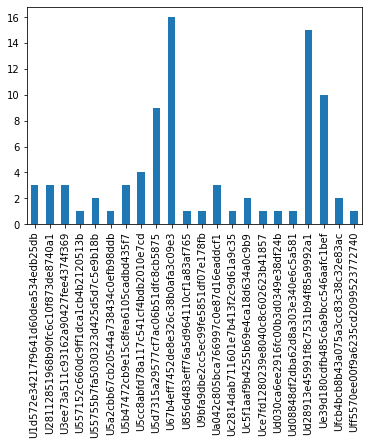

In [ ]:
'''
看看誰發的話多
'''

merge_data['userId'].value_counts().sort_index().plot.bar()
# merge_data['timestamp'].plot.hist()

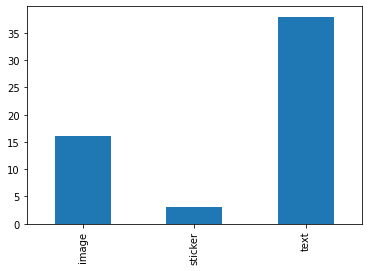

In [ ]:
'''
看看都發哪一類型的消息
'''
merge_data['message_type'].value_counts().sort_index().plot.bar()